# Load, Merge, Clean, and Explore Data # 

### Data Sources ###

*Real risk premium, expected inflation, and inflation risk premium*:<br>
URL: https://www.clevelandfed.org/our-research/indicators-and-data/inflation-expectations.aspx <br>
We acquired data for these variables from the Federal Reserve Bank of Cleaveland's website. This was a comprehensive dataset that provided us with information dating back to 1982. We were able to download the dataset into a CSV file directly from their website. Very minimal cleaning was needed. <br>
<br>
*Actual Inflation:*<br>
URL: https://data.bls.gov/cgi-bin/surveymost?cu <br>
We acquired actual inflation data from the U.S. Bureau of Labor Statistics. Specifically, the inflation numbers were derived from the All items in U.S. average series. We were able to download the data into a Microsoft Excel file which than had to be converted into a CSV file.<br>
<br>
*Real Estate Sector Inflation:*<br>
URL: https://data.bls.gov/cgi-bin/surveymost?cu <br>
We acquired real estate sector inflation data from the U.S. Bureau of Labor Statistics. Specifically, the inflation numbers were derived from the "U.S. Average, Shelter" series. We were able to download the data into a Microsoft Excel file which than had to be converted into a CSV file.<br>
<br>
*Health Sector Inflation:*<br>
URL: https://data.bls.gov/cgi-bin/surveymost?cu <br>
We acquired health sector inflation data from the U.S. Bureau of Labor Statistics. Specifically, the inflation numbers were derived from the "U.S. Average, Medical Care" series. We were able to download the data into a Microsoft Excel file which than had to be converted into a CSV file.<br>
<br>
*Energy Sector Inflation:*<br>
URL: https://data.bls.gov/cgi-bin/surveymost?cu <br>
We acquired energy sector inflation data from the U.S. Bureau of Labor Statistics. Specifically, the inflation numbers were derived from the "U.S. Average, Energy" series. We were able to download the data into a Microsoft Excel file which than had to be converted into a CSV file.<br>
<br>
*Real Estate Sector Stock Prices:*<br>
URL: https://finance.yahoo.com/quote/IYR/history?p=IYR <br>
To find stock prices for the real estate sector, we decided that an index which tracked U.S. real estate equities would be the best proxy. Thus, we landed on the iShares U.S. Real Estate ETF (IYR). This provided us with data stretching back to June 2000. <br>
<br>
*Health Sector Stock Prices:*<br>
URL: https://finance.yahoo.com/quote/XLV/history?p=XLV <br>
To find stock prices for the health sector, we decided that an index which tracked the health care sector would be the the best proxy. The team landed on Health Care Select Sector SPDR Fund (XLV). This provided us with data stretching back to 1998. <br>
<br>
*Energy Sector Stock Prices:*<br>
URL: https://finance.yahoo.com/quote/XLE?p=XLE&.tsrc=fin-srch <br>
To find stock prices for the energy sector, we decided that an index which tracked the energy sector directly would be the best proxy. Thus, we landed on Energy Select Sector SPDR Fund (XLE). This provided us with data stretching back to 1998.<br>
<br>
*Real Estate Inflation Ratio, Health Inflation Ratio, Energy Inflation Ratio, Real Estate Expected Inflation, Health Expected Inflation, Energy Expected Inflation:* <br>
These variables were the result of calculations from the previously mentioned datasets. How we arived on these variables will be described below. <br>

### Data Acquisition ###

Note: An attempt was made to download the Bureau of Labor Statistics(BLS) data directly using python code. There were two avenues in which this could be accomplished: BLS python library and a direct interface with the public data API. The former option was not viable given that there was a low limit on queries that a user could execute. The latter option was provided via the BLS website. However, the code threw a KeyError for a variable. This issue could not be resolved and we decided to contact BLS in regards to it.

* Downloaded the CSV files from their sources and uploaded to github <br>
* Loaded in 15 Seperate CSV files, acquisition channels listed above <br>
* Merged each dataset individually, outer merge on "Date" <br>
* Real Estate Inflation Ratio, Health Inflation Ratio, Energy Inflation Ratio were calculated by dividing actual sector inflation by actual inflation on all items <br>
* Sector expected inflation variables were calculated by multiplying sector ratio by expected inflation on all items <br>

### Data Cleaning Process ###

* Ensured that the columns were titled and titled ones that did not<br>
* We added a month and year column to make reading the data easier. <br>
* Found 8 columns in our initial data set that had some kind of missing or null value: expected_real_estate, expected_energy, expected_health, actual_inflation, energy_price, real_estate_inflation, health_inflation, energy_inflation <br> 
* Discovered seven columns that contain strings or non numeric values: expected_real_estate, expected_energy, expected_health, RE_inflat_ratio, energy_inflat_ratio, heath_inflat_ratio.<br> 
* We changed values that had strings/non-numbers to a 0. <br> 
* For missing values, we took the average of the column. 

# Pull, Merge, and Clean Data into One CSV File 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# loading in expected inflation, real risk premium, inflation risk premium
fed = pd.read_csv ('inputs/inflationexpectations.csv')
df = pd.DataFrame(fed)
fed_df = df.drop(df.index[0:222])

# loading in energy inflation
energy_inflation = pd.read_csv ('inputs/energy_inflation.csv')
energy_inflation_df = pd.DataFrame(energy_inflation)

# loading in health inflation
health_inflation = pd.read_csv ('inputs/health_inflation.csv')
health_inflation_df = pd.DataFrame(health_inflation)

# loading in real estate inflation
realEstate_inflation = pd.read_csv ('inputs/realEstate_inflation.csv')
realEstate_inflation_df = pd.DataFrame(realEstate_inflation)

# loading in energy sector prices
energySec_price = pd.read_csv ('inputs/energySec_price.csv')
energySec_priceDF = pd.DataFrame(energySec_price)

# loading in health sector prices
healthSec_price = pd.read_csv ('inputs/healthSec_price.csv')
healthSec_priceDF = pd.DataFrame(healthSec_price)

# loading in real estate sector prices
realEstateSec_price = pd.read_csv ('inputs/realEstateSec_price.csv')
realEstateSec_priceDF = pd.DataFrame(realEstateSec_price)

# loading in s&p500 prices
spy500_price = pd.read_csv ('inputs/spy500_price.csv')
spy500_priceDF = pd.DataFrame(spy500_price)

# loading in actual inflation
actual_inflation = pd.read_csv ('inputs/actual_inflation.csv')
actual_inflationDF = pd.DataFrame(actual_inflation)

# loading in health inflation ratio
health_inflat_ratio = pd.read_csv ('inputs/health_inflat_ratio.csv')
health_inflat_ratioDF = pd.DataFrame(health_inflat_ratio)

# loading in energy inflation ratio
energy_inflat_ratio = pd.read_csv ('inputs/energy_inflat_ratio.csv')
energy_inflat_ratioDF = pd.DataFrame(energy_inflat_ratio)

# loading in real estate inflation ratio
realEstate_inflat_ratio = pd.read_csv ('inputs/realEstate_inflat_ratio.csv')
realEstate_inflat_ratioDF = pd.DataFrame(realEstate_inflat_ratio)

# loading in expected health inflation
health_expected = pd.read_csv ('inputs/health_expected.csv')
health_expectedDF = pd.DataFrame(health_expected)

# loading in expected energy inflation
energy_expected = pd.read_csv ('inputs/energy_expected.csv')
energy_expectedDF = pd.DataFrame(energy_expected)

# loading in real estate expected inflation
realEstate_expected = pd.read_csv ('inputs/realEstate_expected.csv')
realEstate_expectedDF = pd.DataFrame(realEstate_expected)

In [3]:
# merging the datasets
merge1 = energy_inflation_df.merge(fed_df, how='outer', left_on='Date', right_on = 'Date')
merge2 = health_inflation_df.merge(merge1, how='outer', left_on='Date', right_on = 'Date')
merge3 = realEstate_inflation_df.merge(merge2, how='outer', left_on='Date', right_on = 'Date')
merge4 = energySec_priceDF.merge(merge3, how='outer', left_on='Date', right_on = 'Date')
merge5 = healthSec_priceDF.merge(merge4, how='outer', left_on='Date', right_on = 'Date')
merge6 = realEstateSec_priceDF.merge(merge5, how='outer', left_on='Date', right_on = 'Date')
merge7 = spy500_priceDF.merge(merge6, how='outer', left_on='Date', right_on = 'Date')
merge8 = actual_inflationDF.merge(merge7, how='outer', left_on='Date', right_on = 'Date')
merge9 = health_inflat_ratioDF.merge(merge8, how='outer', left_on='Date', right_on = 'Date')
merge10 = energy_inflat_ratioDF.merge(merge9, how='outer', left_on='Date', right_on = 'Date')
merge11 = realEstate_inflat_ratioDF.merge(merge10, how='outer', left_on='Date', right_on = 'Date')
merge12 = health_expectedDF.merge(merge11, how='outer', left_on='Date', right_on = 'Date')
merge13 = energy_expectedDF.merge(merge12, how='outer', left_on='Date', right_on = 'Date')
final_df = realEstate_expectedDF.merge(merge13, how='outer', left_on='Date', right_on = 'Date')

In [4]:
final_df.rename(columns = {'spy_returns' : 'spy_price'}, inplace = True)
final_df.to_csv('final_df.csv')

In [5]:
# Start of data cleaning
df = pd.read_csv("final_df.csv")

# A. Check if all columns have titles
for i in df.columns:
    if i is None:
        print("Column: " + str(i) + " is of None type")
    if i == "Unnamed: 0":
        print("Column: " + str(i) + " is missing a title")
df. rename(columns = {'Unnamed: 0':'Index'}, inplace = True)

# B. Check if there are missing or null values in any of the columns
list_of_cols_containing_null = df.columns[df.isnull().any()].tolist()
columns_that_contain_missing_or_nulls = len(list_of_cols_containing_null)

# C. Check if there are any string values that are not expected, data set should consist of just numbers
list_of_cols_containing_strings = []
for i in df.columns:
    if(df[i].dtypes == 'object'):
        list_of_cols_containing_strings.append(i)
print(list_of_cols_containing_strings)

# D. Add a month, day, year column to make EDA easier 
df[['Month', 'Day', 'Year']] = df['Date'].str.split('-', expand=True)
# We noticed that all of our data is from the first of the month, so we will drop this column
df = df.drop('Day', axis=1)

# E. Filling in missing or incorrect values and replacing them with averages for the columns
df2 = df._convert(numeric=True)
for i in list_of_cols_containing_strings:
   if i != 'Date':
       mean_value = df2[i].mean()
       df2[i].fillna(value=mean_value, inplace=True)

# F. Saving the working dataframe to a csv file
df2.to_csv('final_df.csv')

Column: Unnamed: 0 is missing a title
['Date', 'expected_real_estate', 'expected_energy', 'expected_health', 'RE_inflat_ratio', 'energy_inflat_ratio', 'heath_inflat_ratio']


# EDA

### Key Observations ###
* The index column had strong expected correlations with spy_returns, real_estate_price, health_price, energy_price, health_inflation <br>
* The index value is only an ID and should not have meaningful information but does increase sequentially, and reflects certain historical trends with our data set <br>
* Each of the columns listed above have increased over time <br> 
* The real_estate_price and health_price variables have strong correlation with the spy_returns variable (0.95 & 0.99 respectively) which showed us the importance of an EDA in this kind of project <br> 
* Observations: Monthly sector performance, monthly sector inflation <br>
* Data ranges from 2000-2022 <br>
* No duplicate observations <br>
* Larger variance in numbers sorrounding the 2008 housing crash <br>
* No impossible values, all data seems to be statistically possible <br>
* No contradicting variables <br>

In [6]:
vars_to_desc = ['expected_real_estate', 'expected_energy','expected_health', 'RE_inflat_ratio', 
                'energy_inflat_ratio', 'heath_inflat_ratio','actual_inflation', 'spy_price', 'real_estate_price', 'health_price', 'energy_price',
                'real_estate_inflation','health_inflation', 'energy_inflation', 'Expected Inflation', 'Real Risk Premium', 'Inflation Risk Premium']

# picks 50 random rows, rerun to see diff parts
final_df[vars_to_desc].sample(25)

,expected_real_estate,expected_energy,expected_health,RE_inflat_ratio,energy_inflat_ratio,heath_inflat_ratio,actual_inflation,spy_price,real_estate_price,health_price,energy_price,real_estate_inflation,health_inflation,energy_inflation,Expected Inflation,Real Risk Premium,Inflation Risk Premium
236,0.205242943,-1.215099853,2.5395504,0.074221649,-2.809641284,3.133333333,1.5,248.923050,65.745911,85.535110,223.40,0.1,4.7,-4.2,1.269775,1.019973,0.013885
70,0.268845128,5.243477825,3.167634111,0.051602782,0.93393862,1,4.2,93.135605,37.092644,22.987480,411.95,0.2,4.2,3.9,2.704078,1.290645,0.441067
232,0.056170104,0.404081616,4.011787244,0.074970287,-0.377473026,2,2.1,302.061066,87.215691,95.055176,431.37,0.2,4.2,-0.8,1.679353,1.199538,0.396463
55,0.443548826,-0.951451191,3.49346448,0.226244344,0.724160632,1.433333333,3.0,86.240334,29.845100,22.465521,350.68,0.7,4.3,2.2,2.437301,1.247541,0.439293
239,2.82038493,-0.033642669,60.3614683,0.281309086,9.379529084,8.5,0.6,299.551025,75.196625,97.099136,287.46,0.2,5.1,5.6,1.231867,1.068222,0.199167
11,0.159975619,4.189894879,3.664721483,0.172219439,0.089221984,1.4375,3.2,82.470856,17.390085,21.308140,230.56,0.6,4.6,0.3,2.868043,1.227771,0.389459
40,0.49548515,-6.267845263,4.35509425,-0.129379496,-1.542082623,1.944444444,1.8,74.321655,23.355143,21.011412,196.96,-0.2,3.5,-2.8,2.354105,1.386363,0.513502
59,-0.152244882,-0.749643463,3.672603279,0.089285714,0.472255018,1.68,2.5,85.538391,32.975895,23.215508,343.07,0.2,4.2,1.2,2.391463,1.202515,0.412273
124,0.071405283,0.643309541,4.865779383,0.033636722,0.440869033,2.909090909,1.1,95.030327,36.085072,24.873529,465.21,0.0,3.2,0.5,1.717334,1.117781,0.350321
57,0.707864386,2.991043898,3.564469742,0,1.794598436,1.228571429,3.5,83.076622,30.723051,23.118242,319.97,0.0,4.3,6.3,2.569734,1.278923,0.460551


In [7]:
# change the row numbers to see diff parts
final_df[vars_to_desc][115:135]

,expected_real_estate,expected_energy,expected_health,RE_inflat_ratio,energy_inflat_ratio,heath_inflat_ratio,actual_inflation,spy_price,real_estate_price,health_price,energy_price,real_estate_inflation,health_inflation,energy_inflation,Expected Inflation,Real Risk Premium,Inflation Risk Premium
115,0.028680448,2.312362089,2.859870865,0.009794601,-0.817434451,1.714285714,2.1,87.562889,29.742207,25.455050,418.27,0.0,3.6,-1.7,2.124475,1.281106,0.461120
116,0.020786762,-1.734814405,3.638172514,0.008941058,1.178956143,1.608695652,2.3,92.512749,32.326797,26.046833,430.31,0.0,3.7,2.7,2.122267,1.251607,0.456113
117,0.019316798,2.547087589,3.475522609,-0.003848167,0.644591814,1.636363636,2.2,94.330757,34.726803,25.117294,449.37,0.0,3.6,1.4,2.160460,1.308166,0.466773
118,-0.008201238,1.3737582,3.487428655,0.013909552,0.325387248,1.7,2.0,86.835770,32.753105,23.482397,396.31,0.0,3.4,0.7,2.131206,1.281738,0.453820
119,0.027940766,0.653620561,3.41486939,0.135575831,-1.146313836,3.181818182,1.1,81.952888,30.956438,22.937428,373.36,0.1,3.5,-1.3,2.008747,1.234078,0.434643
120,0.253850599,-2.146344614,5.957599136,0.06942488,0.28032379,2.666666667,1.2,87.966866,34.159981,23.356495,403.14,0.1,3.2,0.3,1.872388,1.184800,0.431338
121,0.129393793,0.522466274,4.970121867,-0.029976819,0.124567012,2.909090909,1.1,84.010056,33.716873,22.972258,384.14,0.0,3.2,0.1,1.863796,1.165848,0.405465
122,-0.052348282,0.217530389,5.080122473,-0.026695483,-1.137095695,3.090909091,1.1,91.046135,34.973484,24.926130,419.27,0.0,3.4,-1.3,1.746292,1.146790,0.404819
123,-0.046682122,-1.988427757,5.405041509,0.041579149,0.374597823,2.833333333,1.2,95.030327,36.665482,25.613083,442.59,0.0,3.4,0.4,1.748690,1.123623,0.370756
124,0.071405283,0.643309541,4.865779383,0.033636722,0.440869033,2.909090909,1.1,95.030327,36.085072,24.873529,465.21,0.0,3.2,0.5,1.717334,1.117781,0.350321


In [8]:
# A. How many records? what is the max and min of cols? what is stdev?
print(df2.info())
print(df2.head())
print("Our data set contains: " + str(len(df2)) + " records")
print("Our data set shape is: " + str(df.shape))
# B. Check for correlation with the target variable, multi-collinearlity, plots of correlation
# checking for correlation
corr = df2.corr()
print(corr.to_string())

print(df2.describe().to_string())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   262 non-null    int64  
 1   Date                    262 non-null    object 
 2   expected_real_estate    262 non-null    float64
 3   expected_energy         262 non-null    float64
 4   expected_health         262 non-null    float64
 5   RE_inflat_ratio         262 non-null    float64
 6   energy_inflat_ratio     262 non-null    float64
 7   heath_inflat_ratio      262 non-null    float64
 8   actual_inflation        261 non-null    float64
 9   spy_price               262 non-null    float64
 10  real_estate_price       262 non-null    float64
 11  health_price            262 non-null    float64
 12  energy_price            258 non-null    float64
 13  real_estate_inflation   261 non-null    float64
 14  health_inflation        261 non-null    fl

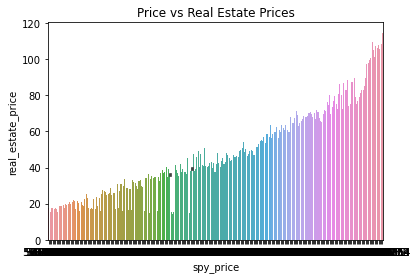

In [9]:
# C. What plots can we output
sns.barplot(x="spy_price", y="real_estate_price", data=df2).set(title='Price vs Real Estate Prices')
plt.rcParams['figure.figsize'] = [15, 15] 
plt.show()

Analysis: This graph shows us the spy prices are highly correlated with the real estate sector prices. It is not a perfect correlation as there are some variants but it still looks fairly linear. This makes logical sense as the stock market has gone up in the past 22 years and real estate prices have gone up as well. Additionally, real estate prices represent a sector of the economy and therefore a rise in real estate prices indirectly translates to a rise in spy prices. 

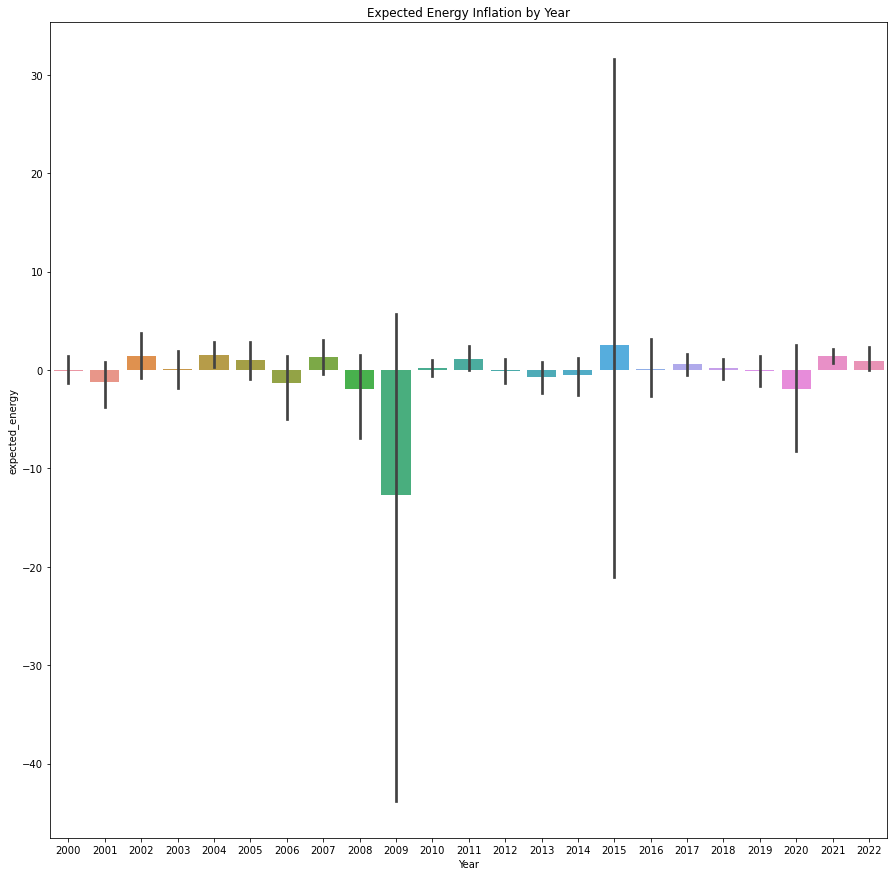

In [10]:
sns.barplot(x="Year", y="expected_energy", data=df2).set(title='Expected Energy Inflation by Year')
plt.rcParams['figure.figsize'] = [15, 15] 
plt.show()

Analysis: The main thing we noticed on this graph is that there is a story in the data. From 2000 to 2007 expected changes in energy are stable. However when the 2008 financial crisis happens, we see the greatest 12 month change in expectations.  Then in 2009, there is maximum accumulation and then in 2010, we see an early 2000’s level of expectation start to reemerge until 2015. However in 2015, OPEC flooded the market with cheap oil which drove crude oil prices down to 2009 levels which explains the large spike in 2015. Then from 2015 to 2022, we begin to see the levels stabilize similar to the early 2000s with the exception of a small 2020 which is due to the start of the pandemic. 

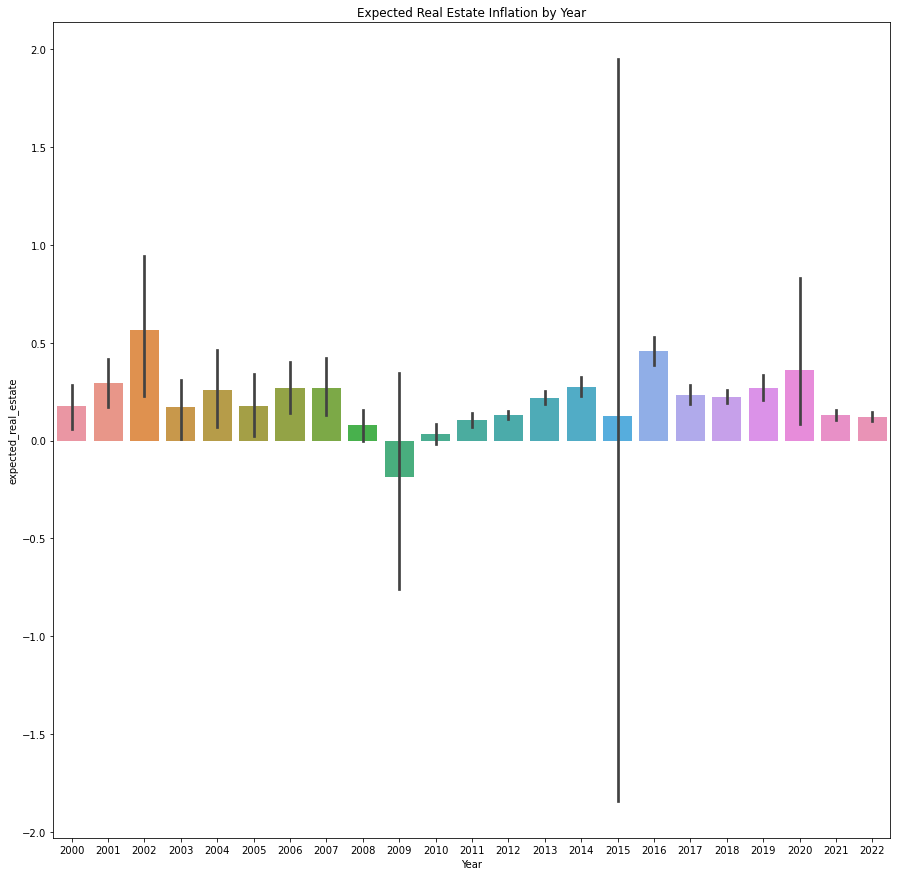

In [11]:
sns.barplot(x="Year", y="expected_real_estate", data=df2).set(title='Expected Real Estate Inflation by Year')
plt.rcParams['figure.figsize'] = [15, 15] 
plt.show()

Analysis: Similarly to the last graph, we see spikes in expected real estate inflation during the 2008 financial crisis, the 2015 OPEC deal, and the start of the pandemic. Another thing of note is that only 2 years had negative expected inflation (2009 and 2015).

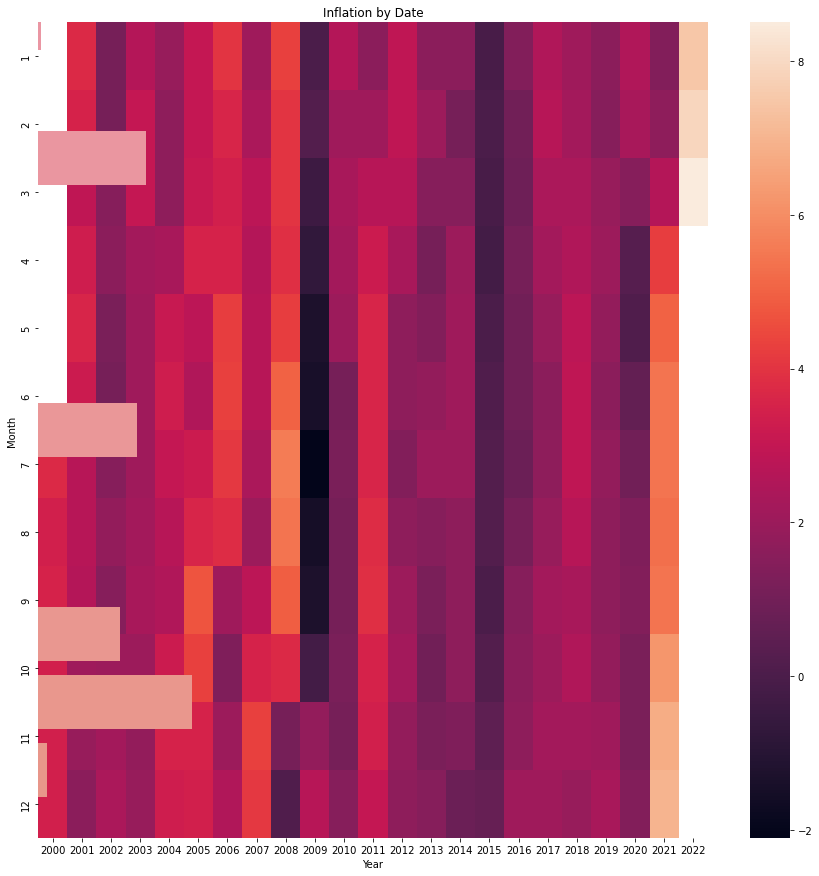

In [12]:
sns.barplot(x="energy_inflation", y="Date", data=df2).set(title='Energy Inflation by Date')
inflation_map = df2.pivot("Month", "Year", "actual_inflation")
ax = sns.heatmap(inflation_map).set(title='Inflation by Date')
plt.rcParams['figure.figsize'] = [15, 15] 
plt.show()

Analysis: In this heat map we can see a few things. First, during the financial crisis we see significantly different negative values shown by the darkest part of the graph. Second, 2015 has a dark portion reflecting trends noted in the previous graph. Lastly, from 2021 onwards we can see a trend of slowly elevating inflation beginning. 

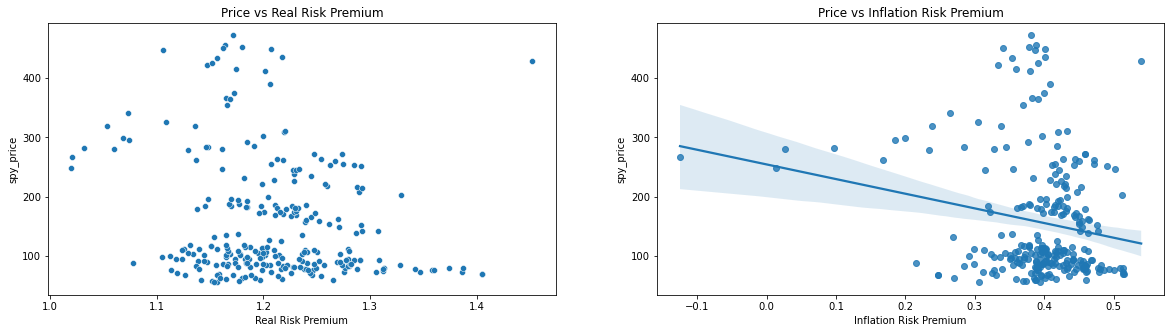

In [13]:
fig = plt.figure(figsize=(20, 5))
fig1 = fig.add_subplot(121); sns.scatterplot(y=df2.spy_price, x=df2['Real Risk Premium'], palette='YlOrRd')
fig2 = fig.add_subplot(122); sns.regplot(x='Inflation Risk Premium', y='spy_price', data=df2)
fig1.title.set_text('Price vs Real Risk Premium')
fig2.title.set_text('Price vs Inflation Risk Premium')
plt.rcParams['figure.figsize'] = [15, 15] 
plt.show()

Analysis: These graphs show that there is not a correlation in every relationship. For example, real risk premiums are not linearly related to spy prices. Similarly, the inflation risk premium is not correlated with spy prices either. 

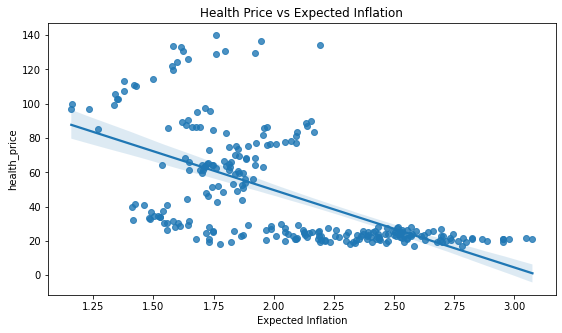

In [14]:
figA = plt.figure(figsize=(20, 5))
fig3 = figA.add_subplot(122); sns.regplot(x='Expected Inflation', y='health_price', data=df2)
fig3.title.set_text('Health Price vs Expected Inflation')
plt.rcParams['figure.figsize'] = [15, 15] 
plt.show()

Analysis: In this graph we see that there is a relationship between expected inflation and prices in the health sector. It is not a particularly strong relationship, when expected inflation is above approximately 2.25, changes in health price are minimal. However, there is increased variability in health prices below the 2.25 mark. Inflation expectations are not the only determinant of health price, so this relationship might not hold true in the future. 

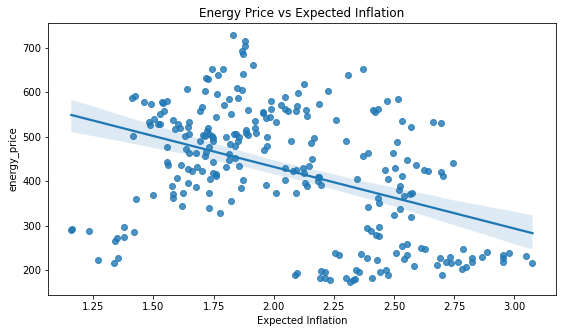

In [15]:
figB = plt.figure(figsize=(20, 5))
fig4 = figB.add_subplot(122); sns.regplot(x='Expected Inflation', y='energy_price', data=df2)
fig4.title.set_text('Energy Price vs Expected Inflation')
plt.rcParams['figure.figsize'] = [15, 15] 
plt.show()

Analysis: When performing a similar analysis on the energy sector, inflation expectations have a different historical pattern. The point at which variability in energy prices is minimal is at 2.75 and above. Additionally, there is an even greater variability in these prices compared to the health sector. There appears to be a weak trend line for these values, but not one that alone could explain a large variance in the data.